In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [6]:
da['SMQ020x'] = da.SMQ020.replace({1: 'Yes', 2: 'No', 7:np.nan, 9: np.nan})
da['RIAGENDRx'] = da.RIAGENDR.replace({1:"Male", 2:"Female"})

In [7]:
dx = da[["SMQ020x", "RIAGENDRx"]].dropna()
pd.crosstab(dx.SMQ020x, dx.RIAGENDRx)

RIAGENDRx,Female,Male
SMQ020x,,
No,2066,1340
Yes,906,1413


In [9]:
dz = dx.groupby(dx.RIAGENDRx).agg({"SMQ020x":[lambda x: np.mean(x=="Yes"), np.size]})
dz.columns = ['Proportion', 'Total_n']

In [10]:
dz

,Proportion,Total_n
RIAGENDRx,,
Female,0.304845,2972
Male,0.513258,2753


In [12]:
p = dz.Proportion.Female
n = dz.Total_n.Female
se_female = np.sqrt(p * (1-p) / n)
se_female

0.008444152146214435

In [14]:
p = dz.Proportion.Male
n = dz.Total_n.Male
se_male = np.sqrt(p * (1-p) / n)
se_male

0.009526078653689868

In [16]:
p = dz.Proportion.Female
n = dz.Total_n.Female
lcb = p - 1.96 * np.sqrt(p * (1-p) / n)
ucb = p + 1.96 * np.sqrt(p * (1-p) / n)
print(lcb, ucb)

0.288294683866098 0.32139576027925865


In [17]:
p = dz.Proportion.Male
n = dz.Total_n.Male
lcb = p - 1.96 * np.sqrt(p * (1-p) / n)
ucb = p + 1.96 * np.sqrt(p * (1-p) / n)
print(lcb, ucb)

0.49458714955108174 0.531929377873546


In [19]:
sm.stats.proportion_confint(906, 906+2066)

(0.2882949879861214, 0.32139545615923526)

In [21]:
sm.stats.proportion_confint(1413, 1413+1340)

(0.49458749263718593, 0.5319290347874418)

In [22]:
se_diff = np.sqrt(se_female**2 + se_male**2)
se_diff

0.012729881381407434

In [23]:
d = dz.Proportion.Female - dz.Proportion.Male
lcb = d - 2*se_diff
ucb = d + 2*se_diff
(lcb, ucb)

(-0.2338728044024504, -0.18295327887682067)

In [26]:
d

-0.20841304163963553

In [28]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30,40,50,60,70,80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": lambda x: np.mean(x=="Yes")}).unstack()
pr.columns = ["Female", "Male"]
pr

,Female,Male
agegrp,,
"(18, 30]",0.226601,0.349265
"(30, 40]",0.286920,0.502183
"(40, 50]",0.268924,0.448878
"(50, 60]",0.421277,0.572687
"(60, 70]",0.374150,0.654462
"(70, 80]",0.324390,0.649254


In [32]:
dn = da.groupby(["agegrp", "RIAGENDRx"]).agg({"SMQ020x": np.size}).unstack()
dn.columns = ["Female", "Male"]

In [34]:
dn

,Female,Male
agegrp,,
"(18, 30]",609,544
"(30, 40]",474,458
"(40, 50]",502,401
"(50, 60]",470,454
"(60, 70]",441,437
"(70, 80]",410,402


In [33]:
se = np.sqrt(pr * (1 - pr) / dn)

In [42]:
se_diff = np.sqrt(se.Female**2 + se.Male**2)

In [43]:
# The difference in smoking rates between genders
pq = pr.Female - pr.Male

Text(0, 0.5, 'Female - male smoking proportion')

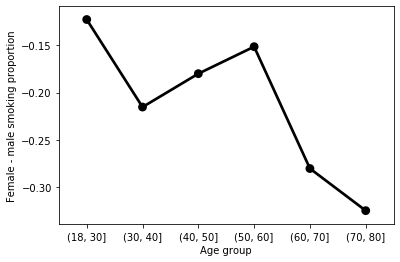

In [46]:
x = np.arange(pq.size)
pp = sns.pointplot(x, pq.values, color='black')
#sns.pointplot(x, pq - 2*se_diff)
#sns.pointplot(x, pq + 2*se_diff)
pp.set_xticklabels(pq.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male smoking proportion")

In [47]:
da.groupby("RIAGENDRx").agg({"BMXBMI": np.mean})

,BMXBMI
RIAGENDRx,
Female,29.939946
Male,28.778072


In [49]:
da.groupby("RIAGENDRx").agg({"BMXBMI": [np.mean, np.std, np.size]})

BMXBMI                  
                mean       std    size
RIAGENDRx                             
Female     29.939946  7.753319  2976.0
Male       28.778072  6.252568  2759.0

In [50]:
sem_female = 7.753319 / np.sqrt(2976)
sem_male = 6.252568 / np.sqrt(2759)
print(sem_female, sem_male)

0.14212523289878048 0.11903716451870151


In [53]:
lcb_female = 29.94 - (1.96 * 7.753) / np.sqrt(2976)
ucb_female = 29.94 + (1.96 * 6.252568) / np.sqrt(2759)

In [54]:
(lcb_female, ucb_female)

(29.661446004723665, 30.173312842456657)

In [56]:
female_bmi = da.loc[da.RIAGENDRx=="Female", "BMXBMI"].dropna()
sm.stats.DescrStatsW(female_bmi).zconfint_mean()

(29.659875498090155, 30.22001580625768)

In [57]:
sem_diff = np.sqrt(sem_female**2 + sem_male**2)
sem_diff

0.18538993598139303

In [58]:
bmi_diff = 29.94 - 28.78
lcb = bmi_diff - 2*sem_diff
ucb = bmi_diff + 2*sem_diff
(lcb, ucb)

(0.7892201280372141, 1.5307798719627863)

In [59]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18,30,40,50,60,70,80])
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()
pr

BMXBMI                                             
                mean                  std             size       
RIAGENDRx     Female       Male    Female      Male Female   Male
agegrp                                                           
(18, 30]   28.123881  27.391822  7.745893  6.649440  609.0  544.0
(30, 40]   30.325586  29.611726  8.315608  6.622412  474.0  458.0
(40, 50]   31.160643  29.724623  8.076195  6.407076  502.0  401.0
(50, 60]   30.743777  29.231486  7.575848  5.914373  470.0  454.0
(60, 70]   31.074828  29.392488  7.604514  5.933307  441.0  437.0
(70, 80]   29.138213  27.957692  6.284968  4.974855  410.0  402.0

In [61]:
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"])
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"])

In [62]:
pr

BMXBMI                                                         \
                mean                  std             size              sem   
RIAGENDRx     Female       Male    Female      Male Female   Male    Female   
agegrp                                                                        
(18, 30]   28.123881  27.391822  7.745893  6.649440  609.0  544.0  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412  474.0  458.0  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076  502.0  401.0  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373  470.0  454.0  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307  441.0  437.0  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855  410.0  402.0  0.310392   

                     
                     
RIAGENDRx      Male  
agegrp               
(18, 30]   0.285092  
(30, 40]   0.309445  
(40, 50]   0.319954  
(50, 60]   0.277575  
(60, 70]   0.283829  
(70, 80]   0.248123

In [64]:
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr

BMXBMI                                                         \
                mean                  std             size              sem   
RIAGENDRx     Female       Male    Female      Male Female   Male    Female   
agegrp                                                                        
(18, 30]   28.123881  27.391822  7.745893  6.649440  609.0  544.0  0.313879   
(30, 40]   30.325586  29.611726  8.315608  6.622412  474.0  458.0  0.381949   
(40, 50]   31.160643  29.724623  8.076195  6.407076  502.0  401.0  0.360458   
(50, 60]   30.743777  29.231486  7.575848  5.914373  470.0  454.0  0.349448   
(60, 70]   31.074828  29.392488  7.604514  5.933307  441.0  437.0  0.362120   
(70, 80]   29.138213  27.957692  6.284968  4.974855  410.0  402.0  0.310392   

                               
                    mean_diff  
RIAGENDRx      Male            
agegrp                         
(18, 30]   0.285092  0.732059  
(30, 40]   0.309445  0.713861  
(40, 50]   0.319954  1.436019  
(50, 60]   0.277575  1.512291  
(60, 70]   0.283829  1.682340  
(70, 80]   0.248123  1.180521

In [ ]:
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2)